# Titanic dataset

In [1]:
import os
import sys

diretorio_atual = os.getcwd()
print(f"Logado no diretório: {diretorio_atual}")
sys.path.append('/home/jovyan/work')

Logado no diretório: /home/jovyan/work


In [2]:
import pandas as pd
import os

TITANIC_PATH = os.path.join("data", "titanic")

def load_titanic_data(filename, titanic_path=TITANIC_PATH):
    csv_path = os.path.join(titanic_path, filename)
    return pd.read_csv(csv_path)

treinamento_original = load_titanic_data("train.csv")
treinamento_original.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [3]:
from sklearn.model_selection import train_test_split
# Dividir a base em características (X) e rótulos (y) 
X = treinamento_original.drop("Survived", axis=1) 
y = treinamento_original["Survived"] 

# Dividir a base em conjuntos de treinamento e teste 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42) 

print(f"Dimensões do conjunto de treinamento: {X_train.shape}") 
print(f"Dimensões do conjunto de teste: {X_test.shape}")

Dimensões do conjunto de treinamento: (623, 11)
Dimensões do conjunto de teste: (268, 11)


In [4]:
X_train.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
445,446,1,"Dodge, Master. Washington",male,4.0,0,2,33638,81.8583,A34,S
650,651,3,"Mitkoff, Mr. Mito",male,NaN,0,0,349221,7.8958,NaN,S
172,173,3,"Johnson, Miss. Eleanor Ileen",female,1.0,1,1,347742,11.1333,NaN,S
450,451,2,"West, Mr. Edwy Arthur",male,36.0,1,2,C.A. 34651,27.7500,NaN,S
314,315,2,"Hart, Mr. Benjamin",male,43.0,1,1,F.C.C. 13529,26.2500,NaN,S


In [5]:
X_test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
709,710,3,"Moubarek, Master. Halim Gonios (""William George"")",male,NaN,1,1,2661,15.2458,NaN,C
439,440,2,"Kvillner, Mr. Johan Henrik Johannesson",male,31.0,0,0,C.A. 18723,10.5000,NaN,S
840,841,3,"Alhomaki, Mr. Ilmari Rudolf",male,20.0,0,0,SOTON/O2 3101287,7.9250,NaN,S
720,721,2,"Harper, Miss. Annie Jessie ""Nina""",female,6.0,0,1,248727,33.0000,NaN,S
39,40,3,"Nicola-Yarred, Miss. Jamila",female,14.0,1,0,2651,11.2417,NaN,C


Os atributos têm o seguinte significado:

* **PassengerId**: um identificador único para cada passageiro
* **Survived**: esse é o alvo, 0 significa que o passageiro não sobreviveu, enquanto 1 significa que ele/ela sobreviveu.
* **Pclass**: classe do passageiro.
* **Name**, **Sex**, **Age**: autoexplicativos
* **SibSp**: quantos irmãos e cônjuges do passageiro a bordo do Titanic.
* **Parch**: quantos filhos e pais do passageiro a bordo do Titanic.
* **Ticket**: id do bilhete
* **Fare**: preço pago (em libras)
* **Cabin**: número da cabine do passageiro
* **Embarked**: onde o passageiro embarcou no Titanic


A coluna `PassengerId` será setada como index.

In [6]:
train_data_experimento = X_train.copy()
test_data_experimento = X_test.copy()

train_data = X_train.set_index("PassengerId")
test_data = X_test.set_index("PassengerId")

In [7]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 623 entries, 446 to 103
Data columns (total 10 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Pclass    623 non-null    int64  
 1   Name      623 non-null    object 
 2   Sex       623 non-null    object 
 3   Age       499 non-null    float64
 4   SibSp     623 non-null    int64  
 5   Parch     623 non-null    int64  
 6   Ticket    623 non-null    object 
 7   Fare      623 non-null    float64
 8   Cabin     139 non-null    object 
 9   Embarked  622 non-null    object 
dtypes: float64(2), int64(3), object(5)
memory usage: 53.5+ KB


In [8]:
train_data[train_data["Sex"]=="female"]["Age"].median()

27.0

The **Name** and **Ticket** attributes may have some value, but they will be a bit tricky to convert into useful numbers that a model can consume. So for now, we will ignore them.

Let's take a look at the numerical attributes:

In [9]:
train_data.describe()

,Pclass,Age,SibSp,Parch,Fare
count,623.000000,499.000000,623.000000,623.000000,623.000000
mean,2.341894,29.256353,0.576244,0.386838,31.840730
std,0.819945,14.558567,1.216267,0.807692,51.027372
min,1.000000,0.420000,0.000000,0.000000,0.000000
25%,2.000000,20.000000,0.000000,0.000000,7.925000
50%,3.000000,28.000000,0.000000,0.000000,14.454200
75%,3.000000,38.000000,1.000000,0.000000,30.750000
max,3.000000,80.000000,8.000000,6.000000,512.329200


In [10]:
train_data["Pclass"].value_counts()

Pclass
3    352
1    139
2    132
Name: count, dtype: int64

In [11]:
train_data["Sex"].value_counts()

Sex
male      410
female    213
Name: count, dtype: int64

In [12]:
train_data["Embarked"].value_counts()

Embarked
S    457
C    110
Q     55
Name: count, dtype: int64


O atributo **Embarked** nos diz onde o passageiro embarcou: C = Cherbourg, Q = Queenstown, S = Southampton.

## Pipeline 



### Variáveis Númericas

In [13]:
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler

num_pipeline = Pipeline(steps=[
    ("imputer", SimpleImputer(strategy="median")),
    ("scaler", StandardScaler())
])


### Variáveis Categóricas

In [14]:
from sklearn.preprocessing import OneHotEncoder

cat_pipeline = Pipeline([
        ("imputer", SimpleImputer(strategy="most_frequent")),
        ("cat_encoder", OneHotEncoder(sparse=False)),
])

**Juntando Variáveis Númericas e Categóricas**

In [15]:
from sklearn.compose import ColumnTransformer

num_attribs = ["Age", "SibSp", "Parch", "Fare"]
cat_attribs = ["Pclass", "Sex", "Embarked"]

preprocess_pipeline = ColumnTransformer(transformers = [
        ("num", num_pipeline, num_attribs),
        ("cat", cat_pipeline, cat_attribs),
])

### Aplica as transformações

In [16]:
X_train = preprocess_pipeline.fit_transform(train_data[num_attribs + cat_attribs])
X_train

/opt/conda/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


array([[-1.91971935, -0.47416141,  1.99885349, ...,  0.        ,
         0.        ,  1.        ],
       [-0.0772525 , -0.47416141, -0.47932706, ...,  0.        ,
         0.        ,  1.        ],
       [-2.15002771,  0.34868694,  0.75976322, ...,  0.        ,
         0.        ,  1.        ],
       ...,
       [ 0.92075038,  1.17153529, -0.47932706, ...,  0.        ,
         0.        ,  1.        ],
       [-1.15202483,  0.34868694,  1.99885349, ...,  0.        ,
         0.        ,  1.        ],
       [-0.61463866, -0.47416141,  0.75976322, ...,  0.        ,
         0.        ,  1.        ]])

In [17]:
y_train

445    1
650    0
172    1
450    0
314    0
      ..
106    1
270    0
860    0
435    1
102    0
Name: Survived, Length: 623, dtype: int64

## Treinamento

### Modelo 1: `RandomForestClassifier`

In [18]:
from sklearn.ensemble import RandomForestClassifier

forest_clf = RandomForestClassifier(n_estimators=100, random_state=42)
forest_clf.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

**Realiza as previções na base de teste**


In [19]:
X_test = preprocess_pipeline.transform(test_data[num_attribs + cat_attribs])
y_pred = forest_clf.predict(X_test)

**Realiza as a cross validation**

In [20]:
# from sklearn.model_selection import cross_val_score
# `cross_val_score`: Calcula uma métrica por vez 
# forest_scores = cross_val_score(forest_clf, X_train, y_train, cv=10, scoring='accuracy')
# forest_scores.mean()
# Saída: 0.7995135688684075

from sklearn.model_selection import cross_validate

# Realizar a validação cruzada com várias métricas
scoring = ['accuracy', 'precision', 'recall', 'f1', 'roc_auc']
forest_scores = cross_validate(estimator=forest_clf, X=X_train,  y=y_train, cv=10, scoring=scoring)

# Calcular as médias das métricas
accuracy = forest_scores['test_accuracy']
precision = forest_scores['test_precision']
recall = forest_scores['test_recall']
f1 = forest_scores['test_f1']
roc_auc = forest_scores['test_roc_auc']

metrics_forest_scores_cv = {
    'Accuracy': accuracy.mean(),
    'Precision': precision.mean(),
    'Recall': recall.mean(),
    'F1 Score': f1.mean(),
    'roc_auc':roc_auc.mean()
}
print(f'Metricas de treinamento durante o cross validation:')
metrics_forest_scores_cv

Metricas de treinamento durante o cross validation:


{'Accuracy': 0.7995135688684075,
 'Precision': 0.7592402653321014,
 'Recall': 0.6971014492753623,
 'F1 Score': 0.7218706000693578,
 'roc_auc': 0.8426714046822743}

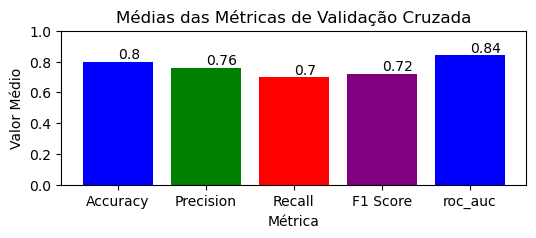

In [21]:
import matplotlib.pyplot as plt

plt.figure(figsize=(6, 2))
bars = plt.bar(metrics_forest_scores_cv.keys(), metrics_forest_scores_cv.values(), color=['blue', 'green', 'red', 'purple'])
plt.xlabel('Métrica')
plt.ylabel('Valor Médio')
plt.title('Médias das Métricas de Validação Cruzada')
plt.ylim(0, 1)

# Adicionar rótulos nas barras
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval, round(yval, 2), va='bottom')  # Ajustar posição do rótulo

plt.show()

### Modelo 2: `Support Vector Classifier (SVC)`

In [22]:
from sklearn.svm import SVC

svm_clf = SVC(gamma="auto")

scoring = ['accuracy', 'precision', 'recall', 'f1', 'roc_auc']
svm_scores = cross_validate(svm_clf, X_train, y_train, cv=10, scoring=scoring)

# Calcular as médias das métricas
accuracy = svm_scores['test_accuracy']
precision = svm_scores['test_precision']
recall = svm_scores['test_recall']
f1 = svm_scores['test_f1']
roc_auc = svm_scores['test_roc_auc']

metrics_svm_scores_cv = {
    'Accuracy': accuracy.mean(),
    'Precision': precision.mean(),
    'Recall (Sensitivity/True Positive Rate)': recall.mean(),
    'F1 Score': f1.mean(),
    'roc_auc':roc_auc.mean()
}
print(f'Metricas de treinamento durante o cross validation:')
metrics_svm_scores_cv

Metricas de treinamento durante o cross validation:


{'Accuracy': 0.8217869943676395,
 'Precision': 0.7865144085510218,
 'Recall (Sensitivity/True Positive Rate)': 0.7144927536231884,
 'F1 Score': 0.7484230371860258,
 'roc_auc': 0.8297979375696768}

Plot da `accuracy` média ao longo das 10 dobras de validação cruzada, usando a função `boxplot()`.

Especificamente: 
- Quartil inferior é $Q_1$
- Quartil superior é $Q_3$
- Intervalo interquartil $IQR = Q_3 - Q_1$ (esta é a altura da caixa)
- Qualquer pontuação menor que $Q_1 - 1.5 \times IQR$ é um `outlier` 
- Qualquer pontuação maior que $Q_3 + 1.5 \times IQR$é um `outlier`

In [23]:
# plt.plot([1]*10, svm_scores, "."): Plota os pontos de dados de precisão do SVM (svm_scores). 
# [1]*10 cria uma lista com dez números 1, o que posiciona todos os pontos do SVM na linha vertical x=1 no gráfico. 
# O parâmetro "." indica que os pontos devem ser plotados como marcadores de ponto (dots).

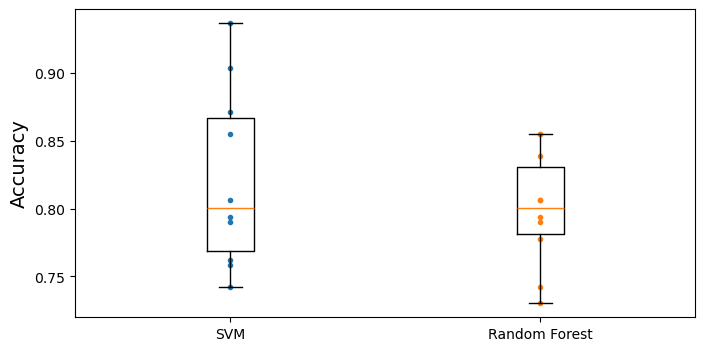

In [24]:
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 4))
plt.plot([1]*10, svm_scores['test_accuracy'], ".") 
plt.plot([2]*10, forest_scores['test_accuracy'], ".")
plt.boxplot([svm_scores['test_accuracy'], forest_scores['test_accuracy']], labels=("SVM","Random Forest"))
plt.ylabel("Accuracy", fontsize=14)
plt.show()

O classificador de floresta aleatória obteve uma pontuação muito alta em uma das 10 dobras, mas, no geral, teve uma pontuação média mais baixa, bem como uma dispersão maior, então parece que o classificador SVM é mais provável de generalizar bem.

## Previsões:

In [25]:
# Aqui os Index serão usados como chave
test_data_experimento['Survived'] = y_test
test_data_experimento.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Survived
709,710,3,"Moubarek, Master. Halim Gonios (""William George"")",male,NaN,1,1,2661,15.2458,NaN,C,1
439,440,2,"Kvillner, Mr. Johan Henrik Johannesson",male,31.0,0,0,C.A. 18723,10.5000,NaN,S,0
840,841,3,"Alhomaki, Mr. Ilmari Rudolf",male,20.0,0,0,SOTON/O2 3101287,7.9250,NaN,S,0
720,721,2,"Harper, Miss. Annie Jessie ""Nina""",female,6.0,0,1,248727,33.0000,NaN,S,1
39,40,3,"Nicola-Yarred, Miss. Jamila",female,14.0,1,0,2651,11.2417,NaN,C,1


In [26]:
# Prever as probabilidades das classes com a `Randon Florest`
# A primeira coluna contém as probabilidades da classe negativa (geralmente 0)
# A segunda coluna contém as probabilidades da classe positiva (geralmente 1)
y_predi_forest_clf = forest_clf.predict(X_test) # Previsão
y_proba_forest_clf = forest_clf.predict_proba(X_test)[:, 1] # Probabilidade

# Cria colunas com as previsões e as probabilidades da `Randon Florest`
test_data_experimento['y_predi_forest_clf'] = y_predi_forest_clf
test_data_experimento['y_proba_forest_clf'] = y_proba_forest_clf
test_data_experimento.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Survived,y_predi_forest_clf,y_proba_forest_clf
709,710,3,"Moubarek, Master. Halim Gonios (""William George"")",male,NaN,1,1,2661,15.2458,NaN,C,1,0,0.34
439,440,2,"Kvillner, Mr. Johan Henrik Johannesson",male,31.0,0,0,C.A. 18723,10.5000,NaN,S,0,0,0.03
840,841,3,"Alhomaki, Mr. Ilmari Rudolf",male,20.0,0,0,SOTON/O2 3101287,7.9250,NaN,S,0,0,0.04
720,721,2,"Harper, Miss. Annie Jessie ""Nina""",female,6.0,0,1,248727,33.0000,NaN,S,1,1,0.99
39,40,3,"Nicola-Yarred, Miss. Jamila",female,14.0,1,0,2651,11.2417,NaN,C,1,0,0.28


In [27]:
# Treinar o modelo SVM com probabilidade ativada
svm_clf = SVC(gamma="auto", probability=True)
svm_clf.fit(X_train, y_train)

# Fazer previsões no conjunto de teste
y_predi_svm_clf = svm_clf.predict(X_test)
y_proba_svm_clf = svm_clf.predict_proba(X_test)[:, 1]

test_data_experimento['y_predi_svm_clf'] = y_predi_svm_clf
test_data_experimento['y_proba_svm_clf'] = y_proba_svm_clf
test_data_experimento.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Survived,y_predi_forest_clf,y_proba_forest_clf,y_predi_svm_clf,y_proba_svm_clf
709,710,3,"Moubarek, Master. Halim Gonios (""William George"")",male,NaN,1,1,2661,15.2458,NaN,C,1,0,0.34,0,0.165110
439,440,2,"Kvillner, Mr. Johan Henrik Johannesson",male,31.0,0,0,C.A. 18723,10.5000,NaN,S,0,0,0.03,0,0.137253
840,841,3,"Alhomaki, Mr. Ilmari Rudolf",male,20.0,0,0,SOTON/O2 3101287,7.9250,NaN,S,0,0,0.04,0,0.150007
720,721,2,"Harper, Miss. Annie Jessie ""Nina""",female,6.0,0,1,248727,33.0000,NaN,S,1,1,0.99,1,0.936121
39,40,3,"Nicola-Yarred, Miss. Jamila",female,14.0,1,0,2651,11.2417,NaN,C,1,0,0.28,1,0.744049


## Salvando as Bases de TREINO e TESTE Escorados

In [28]:
train_data_experimento['Survived'] = y_train
# Escorando a base de treino para calculo de PSI e CSI
prev_treino_forest_clf = forest_clf.predict(X_train) # Previsão
prob_treino_forest_clf = forest_clf.predict_proba(X_train)[:, 1] # Probabilidade
train_data_experimento['y_predi_forest_clf'] = prev_treino_forest_clf
train_data_experimento['y_proba_forest_clf'] = prob_treino_forest_clf

prev_treino_svm_clf = svm_clf.predict(X_train) # Previsão
prob_treino_svm_clf = svm_clf.predict_proba(X_train)[:, 1] # Probabilidade
train_data_experimento['y_predi_svm_clf'] = prev_treino_svm_clf
train_data_experimento['y_proba_svm_clf'] = prob_treino_svm_clf
train_data_experimento.head(2)

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Survived,y_predi_forest_clf,y_proba_forest_clf,y_predi_svm_clf,y_proba_svm_clf
445,446,1,"Dodge, Master. Washington",male,4.0,0,2,33638,81.8583,A34,S,1,1,0.71,1,0.810786
650,651,3,"Mitkoff, Mr. Mito",male,NaN,0,0,349221,7.8958,NaN,S,0,0,0.00,0,0.140404


In [29]:
# Salvando a base de teste em formato CSV
train_data_experimento.to_csv('./data/processed/train_data_experimento.csv', index=False)
test_data_experimento.to_csv('./data/processed/test_data_experimento.csv', index=False)

### **Confusion_matrix: `Randon Forest`**

In [30]:
from sklearn.metrics import confusion_matrix

# Supondo que y_test e y_pred estejam definidos
Random_confusion_matrix = confusion_matrix(y_true = y_test, y_pred = test_data_experimento['y_predi_forest_clf'])

TP_random = Random_confusion_matrix[1, 1]
FP_random = Random_confusion_matrix[0, 1]
TN_random = Random_confusion_matrix[0, 0]
FN_random = Random_confusion_matrix[1, 0]

# Calcular métricas manualmente
acuracia_random = (TP_random + TN_random) / (TP_random + FP_random + TN_random + FN_random)
precisao_random = TP_random / (TP_random + FP_random)
recall_random = TP_random / (TP_random + FN_random)
f1_score_random = 2 * (precisao_random * recall_random) / (precisao_random + recall_random)

print('RandomForestClassifier')
print(f"Acurácia: {acuracia_random}")
print(f"Precisão: {precisao_random}")
print(f"Recall (Sensitivity/True Positive Rate): {recall_random}")
print(f"F1-Score: {f1_score_random}")



RandomForestClassifier
Acurácia: 0.7873134328358209
Precisão: 0.77
Recall (Sensitivity/True Positive Rate): 0.6936936936936937
F1-Score: 0.7298578199052133


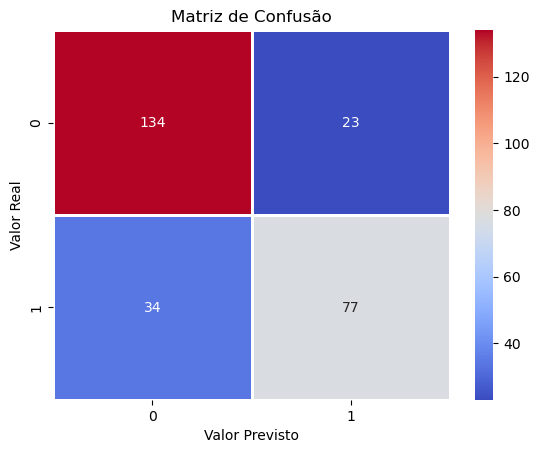

In [31]:
import seaborn as sns
import matplotlib.pyplot as plt

labels = ["0", "1"]
sns.heatmap(Random_confusion_matrix, cmap='coolwarm', annot=True, linewidth=1, fmt='d', xticklabels=labels, yticklabels=labels)
# Criando o heatmap com rótulos nos eixos
plt.xlabel('Valor Previsto')
plt.ylabel('Valor Real')
plt.title('Matriz de Confusão')
plt.show()

### **Confusion_matrix: `SVM`**

In [32]:
from sklearn.metrics import confusion_matrix

# Supondo que y_test e y_pred estejam definidos
svm_confusion_matrix = confusion_matrix(y_true = y_test, y_pred = test_data_experimento['y_predi_svm_clf'])

TP_svm = svm_confusion_matrix[1, 1]
FP_svm = svm_confusion_matrix[0, 1]
TN_svm = svm_confusion_matrix[0, 0]
FN_svm = svm_confusion_matrix[1, 0]

# Calcular métricas manualmente
acurácia_svm = (TP_svm + TN_svm) / (TP_svm + FP_svm + TN_svm + FN_svm)
precisão_svm = TP_svm / (TP_svm + FP_svm)
recall_svm = TP_svm / (TP_svm + FN_svm)
f1_score_svm = 2 * (precisão_svm * recall_svm) / (precisão_svm + recall_svm)

print('RandomForestClassifier')
print(f"Acurácia: {acurácia_svm}")
print(f"Precisão: {precisão_svm}")
print(f"Recall (Sensitivity/True Positive Rate): {recall_svm}")
print(f"F1-Score: {f1_score_svm}")



RandomForestClassifier
Acurácia: 0.8283582089552238
Precisão: 0.8350515463917526
Recall (Sensitivity/True Positive Rate): 0.7297297297297297
F1-Score: 0.7788461538461539


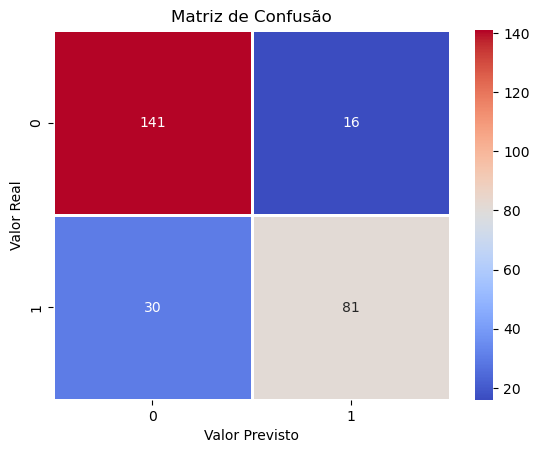

In [33]:
labels = ["0", "1"]
sns.heatmap(svm_confusion_matrix, cmap='coolwarm', annot=True, linewidth=1, fmt='d', xticklabels=labels, yticklabels=labels)
# Criando o heatmap com rótulos nos eixos
plt.xlabel('Valor Previsto')
plt.ylabel('Valor Real')
plt.title('Matriz de Confusão')
plt.show()

## **Perceba que a diagonal principal de uma matriz de confusão é formada pelos quadrantes de Verdadeiros Positivos (TP) e Verdadeiros Negativos (TN). Estes valores são particularmente significativos porque representam as previsões corretas do modelo**


![Imagem](../image/matriz_confusao_hand.png)



---

### RECALL (Revocação)

> **Taxa de Verdadeiros Positivos (TPR- True Positive Rate) ou Sensibilidade ou Recall (1−FNR):**



> **Proporção dos verdadeiros positivos em relação ao total de casos positivos reais.**

> O foco do recall é na cobertura completa dos casos positivos existentes. 
>Isso significa que o recall é crucial em situações onde não se pode deixar passar nenhum caso
positivo. A fórmula do recall é expressa da seguinte forma:

<br> </br>

$$
\text{TPR} = \frac{\text{True Positives (TP)}}{\text{True Positives (TP)} + \text{False Negatives (FN)}}
$$

In [34]:
print(' -- RandomForestClassifier -- ')
print(f'TP: {TP_random}')
print(f'FN: {FN_random}')

print(f'Recall (Sensitivity/True Positive Rate): {TP_random/(TP_random+FN_random)}')
print(' ---------------------------- ')

print(' -- SVM -- ')
print(f'TP: {TP_svm}')
print(f'FN: {FN_svm}')

print(f'Recall (Sensitivity/True Positive Rate): {TP_svm/(TP_svm+FN_svm)}')
print(' ---------------------------- ')


 -- RandomForestClassifier -- 
TP: 77
FN: 34
Recall (Sensitivity/True Positive Rate): 0.6936936936936937
 ---------------------------- 
 -- SVM -- 
TP: 81
FN: 30
Recall (Sensitivity/True Positive Rate): 0.7297297297297297
 ---------------------------- 


---

### **Especificidade (Specificity)**

> **Taxa de Verdadeiros Negativos (TNR- True Negative Rare) ou Especificidade, (1−FPR)**

> **Proporção de verdadeiros negativos em relação ao total de casos negativos reais**.

<br> </br>
$$
\text{TNR} = \frac{\text{True Negatives (TN)}}{\text{True Negatives (TN)} + \text{False Positives (FP)}}
$$


In [35]:
print('-- RandomForestClassifier --') 
print(f'TN: {TN_random}')
print(f'FP: {FP_random}')
print(f'Especificidade (TNR- True Negative Rare): {TN_random/(TN_random+FP_random)}')
print('')
print('-------------')
print('')
print('-- SVM --') 
print(f'TN: {TN_svm}')
print(f'FP: {FP_svm}')
print(f'Especificidade (TNR - True Negative Rate): {TN_svm/(TN_svm+FP_svm)}')



-- RandomForestClassifier --
TN: 134
FP: 23
Especificidade (TNR- True Negative Rare): 0.8535031847133758

-------------

-- SVM --
TN: 141
FP: 16
Especificidade (TNR - True Negative Rate): 0.8980891719745223


---

### **Taxa de Falsos Positivos (FPR - False Positive Rate), (1−TNR)**

> **Proporção dos falsos positivos em relação ao total de casos negativos reais.**
$$
\text{TPR} = \frac{\text{False Positive (FP)}}{\text{False Positive (FP)} + \text{True Negative (TN)}}
$$

In [36]:
print('-- RandomForestClassifier --') 
print(f'FP:{FP_random}')
print(f'TN:{TN_random}')
print(f'Taxa de Falsos Positivos (FPR - False Positive Rate): {FP_random/(FP_random+TN_random)}')
print('')
print('-------------')
print('')
print('-- SVM --') 
print(f'FP: {FP_svm}')
print(f'TN: {TN_svm}')
print(f'Taxa de Falsos Positivos (FPR - False Positive Rate): {FP_svm/(FP_svm+TN_svm)}')


-- RandomForestClassifier --
FP:23
TN:134
Taxa de Falsos Positivos (FPR - False Positive Rate): 0.1464968152866242

-------------

-- SVM --
FP: 16
TN: 141
Taxa de Falsos Positivos (FPR - False Positive Rate): 0.10191082802547771


---

###  Taxa de Falsos Negativos (FNR - False Negative Rate), (1−TPR):

**Proporção de falsos negativos em relação ao total de casos positivos reais**

$$
\text{FNP} = \frac{\text{False Negative (FN)}}{\text{False Negative (FN)} + \text{True Positive (TP)}}
$$



In [37]:
print('-- RandomForestClassifier --') 
print(f'FN:{FN_random}')
print(f'TP:{TP_random}')
print(f'Taxa de Falsos Negativos (FNR - False Negative Rate): {FN_random/(FN_random+TP_random)}')
print('')
print('-------------')
print('')
print('-- SVM --') 
print(f'FN: {FN_svm}')
print(f'TP: {TP_svm}')
print(f'Taxa de Falsos Negativos (FNR - False Negative Rate): {FN_svm/(FN_svm+TP_svm)}')


-- RandomForestClassifier --
FN:34
TP:77
Taxa de Falsos Negativos (FNR - False Negative Rate): 0.3063063063063063

-------------

-- SVM --
FN: 30
TP: 81
Taxa de Falsos Negativos (FNR - False Negative Rate): 0.2702702702702703


---

### **Precisão (precision)**

A precisão é a métrica que avalia a **proporção das previsões verdadeiras positivas em relação ao total de previsões positivas feitas
por um modelo.** Matematicamente, ela é calculada como a razão entre os Verdadeiros Positivos (VP ou TP) e a soma dos Verdadeiros Positivos (VP ou TP)
e Falsos Positivos (FP). Ou seja, a precisão mede a proporção de previsões positivas que são efetivamente corretas. A fórmula da
precisão é a seguinte:


$$\text{Precision} = \frac{\text{True Positive (TP)}}{\text{True Positive (TP)} + \text{False Positive (FP)}}$$




In [38]:
print('-- RandomForestClassifier --')
print(f'TP: {TP_random}')
print(f'FP: {FP_random}')
print(f'Precisão (Precision): {TP_random/(TP_random+FP_random)}')
print('')
print('-------------')
print('')
print('-- SVM --')
print(f'TP: {TP_svm}')
print(f'FP: {FP_svm}')

print(f'Precisão (Precision): {TP_svm/(TP_svm+FP_svm)}')


-- RandomForestClassifier --
TP: 77
FP: 23
Precisão (Precision): 0.77

-------------

-- SVM --
TP: 81
FP: 16
Precisão (Precision): 0.8350515463917526


## Curva ROC AUC

* A curva ROC plota a taxa de verdadeiros positivos (recall) contra a taxa de falsos positivos (FPR).
* Ela exibe a capacidade de um modelo de classificação em distinguir entre as classes em vários limiares de decisão. Esta curva é construída
plotando a **Taxa de Verdadeiros Positivos (TPR)** contra a **Razão de Falsos Positivos (FPR)** em diferentes pontos de corte de probabilidade.

In [39]:
from sklearn.metrics import roc_auc_score, roc_curve
import matplotlib.pyplot as plt

roc_auc Random Forest: 0.7735984392035348
----------


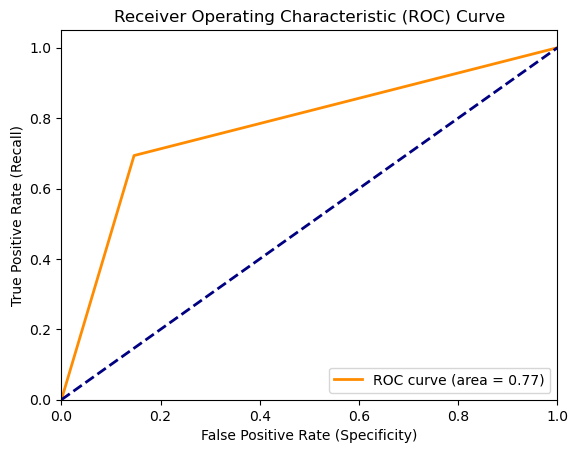

In [40]:

# Calcular AUC da curva ROC `Random Forest`
roc_auc = roc_auc_score(
    y_true=y_test, 
    y_score=test_data_experimento['y_predi_forest_clf']
)
print(f'roc_auc Random Forest: {roc_auc}')
print('----------')
# Calcular os pontos da curva ROC
fpr, tpr, thresholds = roc_curve(
    y_true=y_test, 
    y_score=test_data_experimento['y_predi_forest_clf']
)

# Plotar a curva ROC
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (area = {roc_auc:0.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate (Specificity)')
plt.ylabel('True Positive Rate (Recall)')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()



roc_auc SVM: 0.8139094508521261
----------


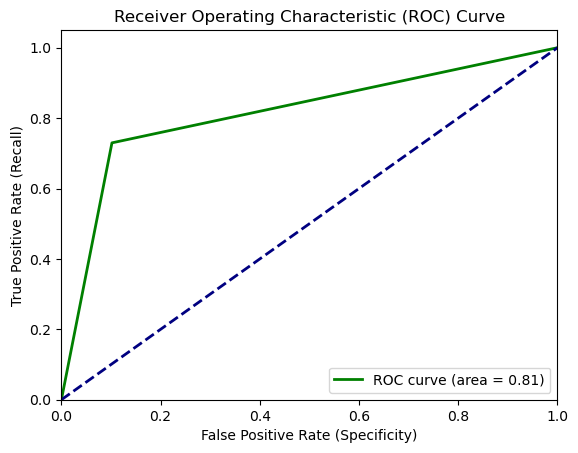

In [41]:
from sklearn.metrics import roc_auc_score, roc_curve
import matplotlib.pyplot as plt

# Calcular AUC da curva ROC `SVM`
roc_auc = roc_auc_score(
    y_true=y_test, 
    y_score=test_data_experimento['y_predi_svm_clf']
)
print(f'roc_auc SVM: {roc_auc}')
print('----------')

# Calcular os pontos da curva ROC
fpr, tpr, thresholds = roc_curve(
    y_true=y_test, 
    y_score=test_data_experimento['y_predi_svm_clf']
)

# Plotar a curva ROC
plt.figure()  # Criar uma nova figura para o gráfico
plt.plot(fpr, tpr, color='green', lw=2, label=f'ROC curve (area = {roc_auc:0.2f})')  # Plotar a curva ROC
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')  # Plotar a linha de referência 45 graus
plt.xlim([0.0, 1.0])  # Definir os limites do eixo x
plt.ylim([0.0, 1.05])  # Definir os limites do eixo y
plt.xlabel('False Positive Rate (Specificity)')
plt.ylabel('True Positive Rate (Recall)')
plt.title('Receiver Operating Characteristic (ROC) Curve')  
plt.legend(loc="lower right")  # Adicionar a legenda no canto inferior direito
plt.show()  

In [42]:
# roc curve for models
fpr_1, tpr_1, thresholds_1 = roc_curve(y_true=y_test, y_score=test_data_experimento['y_predi_forest_clf'])
fpr_2, tpr_2, thresholds_2 = roc_curve(y_true=y_test, y_score=test_data_experimento['y_predi_svm_clf'])

# roc curve for tpr = fpr 
random_probs = [0 for i in range(len(y_test))]
p_fpr, p_tpr, _ = roc_curve(y_test, random_probs, pos_label=1)

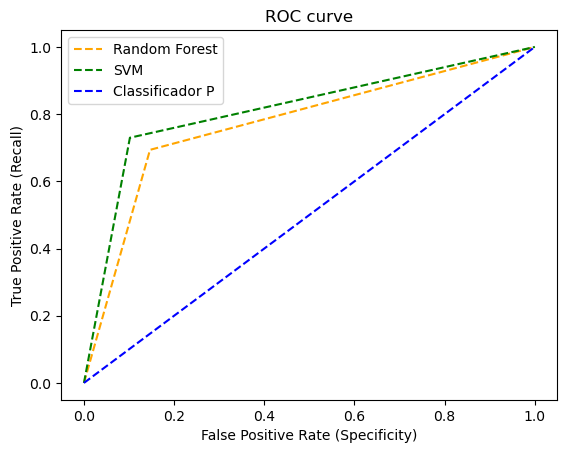

In [43]:
import matplotlib.pyplot as plt

# Plotando as curvas ROC
plt.plot(fpr_1, tpr_1, linestyle='--', color='orange', label='Random Forest')
plt.plot(fpr_2, tpr_2, linestyle='--', color='green', label='SVM')
plt.plot(p_fpr, p_tpr, linestyle='--', color='blue', label='Classificador P')


plt.title('ROC curve')
plt.xlabel('False Positive Rate (Specificity)')
plt.ylabel('True Positive Rate (Recall)')

# Legenda
plt.legend(loc='best')
# Salvando a figura
# plt.savefig('ROC', dpi=300)
plt.show()


* Quanto maior a `revocação (TPR)`, mais `falsos positivos (FPR)` o classificador produz. Conforme aumentamos a
revocação, o modelo tende a classificar mais casos como positivos para garantir que está encontrando todos os verdadeiros positivos. No
entanto, isso acaba aumentando também o número de falsos positivos.

### **Curva PR(Precisão/Recall)**

In [44]:
from sklearn.metrics import precision_recall_curve, auc
import matplotlib.pyplot as plt

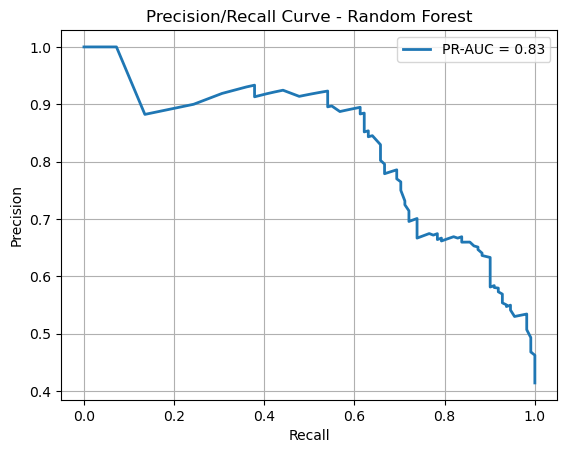

In [45]:
# PR(Precisão/Recall)`Random Forest`
precisions, recalls, thresholds = precision_recall_curve(y_true=y_test, probas_pred = test_data_experimento['y_proba_forest_clf'])
pr_auc = auc(x=recalls, y=precisions)

# Plotar a curva Precision/Recall
plt.plot(recalls, precisions, linewidth=2, label=f'PR-AUC = {pr_auc:.2f}')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.legend(loc='upper right')
plt.title('Precision/Recall Curve - Random Forest')
plt.grid(True)
plt.show()


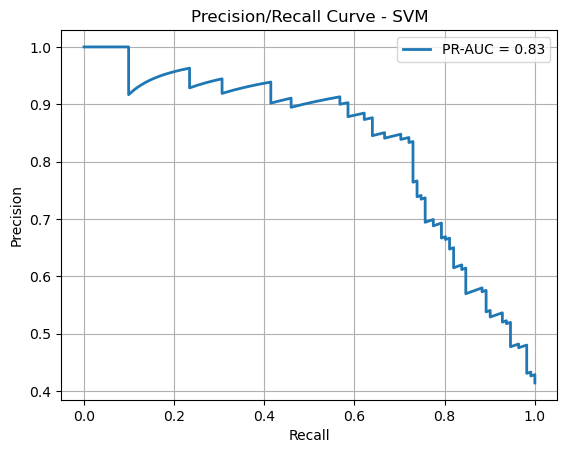

In [46]:
# PR(Precisão/Recall)`SVM`
precisions, recalls, thresholds = precision_recall_curve(y_true=y_test, probas_pred = test_data_experimento['y_proba_svm_clf'])
pr_auc = auc(x=recalls, y=precisions)

# Plotar a curva Precision/Recall
plt.plot(recalls, precisions, linewidth=2, label=f'PR-AUC = {pr_auc:.2f}')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.legend(loc='upper right')
plt.title('Precision/Recall Curve - SVM')
plt.grid(True)
plt.show()

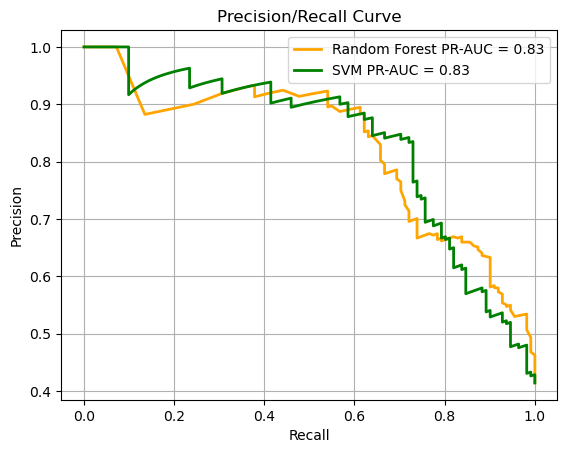

In [47]:
# Calcular curvas Precision/Recall
precisions_1, recalls_1, thresholds_1 = precision_recall_curve(y_true=y_test, probas_pred=test_data_experimento['y_proba_forest_clf'])
precisions_2, recalls_2, thresholds_2 = precision_recall_curve(y_true=y_test, probas_pred=test_data_experimento['y_proba_svm_clf'])

pr_auc_1 = auc(x=recalls_1, y=precisions_1)
pr_auc_2 = auc(x=recalls_2, y=precisions_2)

# Plotar as curvas Precision/Recall
plt.plot(recalls_1, precisions_1, color='orange', linewidth=2, label=f'Random Forest PR-AUC = {pr_auc_1:.2f}')
plt.plot(recalls_2, precisions_2, color='green', linewidth=2, label=f'SVM PR-AUC = {pr_auc_2:.2f}')

# Configurar o gráfico
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.legend(loc='upper right')
plt.title('Precision/Recall Curve')
plt.grid(True)

# Mostrar o gráfico
plt.show()

* Ao buscar valores de `precisão` mais elevados, notamos que o `recall` diminui drasticamente, caindo para valores extremamente baixos.

## Curva ROC Ou Curva PR


> **A ROC-AUC é útil em conjuntos de dados equilibrados**, pois dá uma visão geral do desempenho do modelo, considerando tanto os
` Verdadeiros Positivos (TPR)` quanto os `Falsos Positivos (FPR)`. Contudo, em conjuntos desbalanceados (quando uma classe domina a outra), a
 ROC-AUC pode ser enganosa.

>Já a P**R-AUC foca em precisão e recall, o que é mais útil quando a classe positiva é `rara(dados desbalanceados)`**, ou quando os falsos
positivos têm um grande impacto no negócio. Por exemplo, em detecção de spam, você quer garantir que a maioria dos e-mails que são
classificados como spam realmente sejam spam, logo `PR-AUC` pode ser melhor.

Exemplo para ilustrar porque a **Curva PR é melhor para dados desbalanceados**:

- Total de exemplos: 10.000
- Classe Positiva (minoritária): 500 (pessoas com a doença)
- Classe Negativa (majoritária): 9.500(pessoas sem a doença)
Agora, vamos supor que temos um classificador com os seguintes resultados:

- **Verdadeiros Positivos (TP):** 450 (o modelo previu corretamente 450 pessoas com a doença)
- **Falsos Negativos (FN):** 50 (o modelo não detectou 50 pessoas com a doença)
- **Verdadeiros Negativos (TN):** 9.200 (o modelo previu corretamente 9.200 pessoas sem a doença)
- **Falsos Positivos (FP):** 300 (o modelo disse que 300 pessoas sem a doença tinham a doença)


**Cálculo da ROC-AUC:**

- Taxa de Verdadeiros Positivos (TPR ou Recall): TP/(TP+FN) = 450/(450+50) = 0.9
- Taxa de Falsos Positivos (FPR): FP/(FP/TN) = 300/(300+9.200) = 0.0316

  - Agora, veja que a **FPR é muito baixa (0.0316)**. Isso ocorre porque temos muitos Verdadeiros Negativos (TN = 9.200) em comparação 
  com os Falsos Positivos (FP = 300), o que diminui o valor da FPR, mesmo que haja 300 erros de classificação.
  - Então, a ROC-AUC pode parecer boa, já que a FPR é pequena, mesmo que o número de Falsos Positivos seja grande. O modelo
      parece estar funcionando bem na ROC-AUC, pois a maioria das pessoas está na classe negativa (9.500).

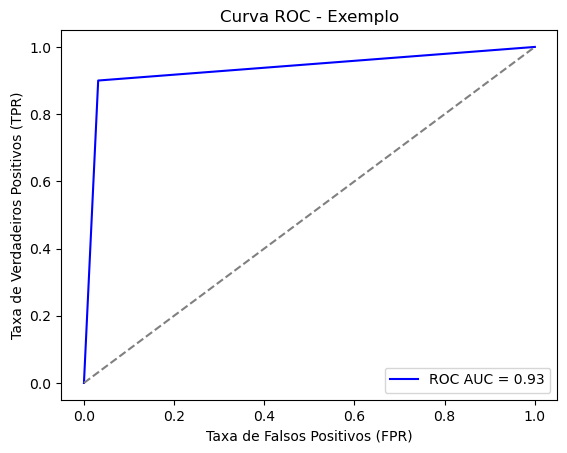

In [48]:
import numpy as np
TP = 450  
FN = 50  
TN = 9200 
FP = 300
y_true = np.array([1]*TP + [0]*FP + [0]*TN + [1]*FN)
y_scores = np.array([1]*TP + [1]*FP + [0]*TN + [0]*FN)

fpr, tpr, _ = roc_curve(y_true, y_scores)
roc_auc = auc(fpr, tpr)
plt.plot(fpr, tpr, color='blue', label=f'ROC AUC = {roc_auc:.2f}')
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')
plt.xlabel('Taxa de Falsos Positivos (FPR)')
plt.ylabel('Taxa de Verdadeiros Positivos (TPR)')
plt.title('Curva ROC - Exemplo')
plt.legend(loc='lower right')
plt.show()

**Cálculo da PR-AUC:**

- Taxa de Verdadeiros Positivos (TPR ou Recall): TP/(TP+FN) = 450/(450+50) = 0.9
- Precisão (Precision): TP/(TP+FP): 450(450+300): 0.6

  - Aqui, a Precisão (0.6) é muito mais afetada pelos Falsos Positivos (FP = 300), o que reflete o fato de que o modelo está cometendo muitos
erros ao prever a classe positiva (pessoas sem a doença sendo classificadas como tendo a doença). O foco na classe positiva faz com que a
PR-AUC seja mais baixa em comparação à ROC-AUC, refletindo melhor o impacto dos erros no modelo.

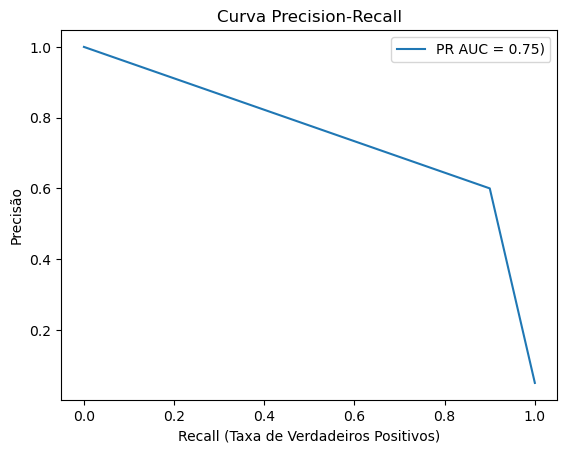

In [49]:
precision, recall, _ = precision_recall_curve(y_true, y_scores)
pr_auc = auc(recall, precision)
plt.plot(recall, precision, label=f'PR AUC = {pr_auc:.2f})')
plt.xlabel('Recall (Taxa de Verdadeiros Positivos)')
plt.ylabel('Precisão')
plt.title('Curva Precision-Recall')
plt.legend(loc='upper right')
plt.show()